<a href="https://colab.research.google.com/github/margiecaina/AbeyDentalClinicApp/blob/master/2_Athlete_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATASOURCE FROM KAGGLE

[Predict NHL Player Salaries](https://www.kaggle.com/datasets/camnugent/predict-nhl-player-salaries?fbclid=IwZXh0bgNhZW0CMTEAAR2gJARo0hYfDDEzCHjBdIZt9uHmnHwM0VNbsXLsSl0OaqajnTXrnDlxjMw_aem_hPB9Hpt42oUJLNQvzbea_Q)

In [1]:
#import required libraries
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
import seaborn as sb


In [2]:
print ("Display the original dataset of TRAIN DATA FOR ATHLETE - train.csv \n")
df = pd.read_csv('/content/sample_data/train.csv', delimiter =',', encoding='latin-1')
df = pd.DataFrame(df)
print(df.head())


Display the original dataset of TRAIN DATA FOR ATHLETE - train.csv 

    Salary      Born          City Pr/St Cntry  Nat  Ht   Wt   DftYr  DftRd  \
0   925000  97-01-30  Sainte-Marie    QC   CAN  CAN  74  190  2015.0    1.0   
1  2250000  93-12-21        Ottawa    ON   CAN  CAN  74  207  2012.0    1.0   
2  8000000  88-04-16      St. Paul    MN   USA  USA  72  218  2006.0    1.0   
3  3500000  92-01-07        Ottawa    ON   CAN  CAN  77  220  2010.0    1.0   
4  1750000  94-03-29       Toronto    ON   CAN  CAN  76  217  2012.0    1.0   

   ...  PEND  OPS  DPS   PS     OTOI Grit   DAP   Pace    GS  GS/G  
0  ...   1.0  0.0 -0.2 -0.2    40.03    1   0.0  175.7  -0.4 -0.38  
1  ...  98.0 -0.2  3.4  3.2  2850.59  290  13.3  112.5  14.1  0.18  
2  ...  70.0  3.7  1.3  5.0  2486.75  102   6.6  114.8  36.8  0.57  
3  ...  22.0  0.0  0.4  0.5  1074.41  130  17.5  105.1   5.9  0.20  
4  ...  68.0 -0.1  1.4  1.3  3459.09  425   8.3   99.5  21.8  0.27  

[5 rows x 154 columns]


In [3]:
df

,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,...,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
0,925000,97-01-30,Sainte-Marie,QC,CAN,CAN,74,190,2015.0,1.0,...,1.0,0.0,-0.2,-0.2,40.03,1,0.0,175.7,-0.4,-0.38
1,2250000,93-12-21,Ottawa,ON,CAN,CAN,74,207,2012.0,1.0,...,98.0,-0.2,3.4,3.2,2850.59,290,13.3,112.5,14.1,0.18
2,8000000,88-04-16,St. Paul,MN,USA,USA,72,218,2006.0,1.0,...,70.0,3.7,1.3,5.0,2486.75,102,6.6,114.8,36.8,0.57
3,3500000,92-01-07,Ottawa,ON,CAN,CAN,77,220,2010.0,1.0,...,22.0,0.0,0.4,0.5,1074.41,130,17.5,105.1,5.9,0.20
4,1750000,94-03-29,Toronto,ON,CAN,CAN,76,217,2012.0,1.0,...,68.0,-0.1,1.4,1.3,3459.09,425,8.3,99.5,21.8,0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,600000,92-09-26,Denver,CO,USA,USA,73,201,2011.0,3.0,...,47.0,0.0,1.3,1.3,3023.36,100,6.9,103.6,23.2,0.33
608,9000000,85-01-21,Madison,WI,USA,USA,74,206,2003.0,1.0,...,112.0,2.7,6.6,9.3,2715.54,213,6.3,111.3,44.1,0.54
609,4250000,87-03-30,Montreal,QC,CAN,CAN,73,205,2005.0,2.0,...,75.0,1.7,4.1,5.8,2855.83,200,4.1,108.8,32.5,0.43
610,7000000,82-10-31,Kladno,NaN,CZE,CZE,71,196,2001.0,3.0,...,74.0,0.5,1.9,2.4,3287.74,126,7.3,113.2,38.7,0.50


In [4]:
df.describe()

,Salary,Ht,Wt,DftYr,DftRd,Ovrl,GP,G,A,A1,...,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
count,6.120000e+02,612.00000,612.000000,512.000000,512.000000,512.000000,612.000000,612.000000,612.000000,612.000000,...,611.000000,612.000000,612.000000,612.000000,611.000000,612.000000,612.000000,611.000000,611.000000,610.000000
mean,2.264509e+06,72.98366,200.745098,2008.787109,2.703125,66.710938,51.566993,7.743464,13.006536,7.235294,...,48.029460,1.309804,1.331046,2.643301,2051.150540,131.632353,9.379739,108.858592,22.263830,0.339082
std,2.236340e+06,2.08016,14.952420,4.440032,1.983728,63.012458,29.110441,8.629748,12.624371,7.462741,...,33.466878,2.038557,1.386627,2.866741,1153.020098,104.257159,8.010665,8.783519,21.991382,0.296025
min,5.750000e+05,67.00000,160.000000,1990.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,-1.700000,-0.200000,-1.200000,33.510000,0.000000,0.000000,77.600000,-4.300000,-0.810000
25%,7.425000e+05,72.00000,190.000000,2006.000000,1.000000,15.000000,24.000000,1.000000,2.000000,1.000000,...,16.500000,0.000000,0.200000,0.200000,945.665000,46.750000,4.800000,104.450000,2.950000,0.142500
50%,9.250000e+05,73.00000,200.000000,2010.000000,2.000000,45.000000,63.500000,5.000000,9.000000,5.000000,...,48.000000,0.400000,1.000000,1.700000,2490.380000,118.000000,7.550000,108.900000,16.200000,0.305000
75%,3.500000e+06,74.00000,210.000000,2012.000000,4.000000,104.000000,78.000000,12.000000,20.000000,11.000000,...,74.000000,2.100000,1.900000,4.400000,3022.865000,195.250000,12.000000,113.900000,35.250000,0.530000
max,1.380000e+07,81.00000,265.000000,2016.000000,9.000000,279.000000,82.000000,44.000000,63.000000,36.000000,...,137.000000,10.500000,7.200000,12.900000,3527.100000,622.000000,61.000000,175.700000,99.200000,1.260000


In [5]:
print(df.columns)

Index(['Salary', 'Born', 'City', 'Pr/St', 'Cntry', 'Nat', 'Ht', 'Wt', 'DftYr',
       'DftRd',
       ...
       'PEND', 'OPS', 'DPS', 'PS', 'OTOI', 'Grit', 'DAP', 'Pace', 'GS',
       'GS/G'],
      dtype='object', length=154)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Columns: 154 entries, Salary to GS/G
dtypes: float64(73), int64(71), object(10)
memory usage: 736.4+ KB


In [7]:
print(df.shape)

(612, 154)


In [8]:
#store the sum of missing values in each column -
missing_val = df.isnull().sum()
missing_val

,0
Salary,0
Born,0
City,0
Pr/St,153
Cntry,0
...,...
Grit,0
DAP,0
Pace,1
GS,1


In [9]:
#Reset the index values after dropping the invalid values
df.reset_index(drop = True)
df.tail()

,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,...,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
607,600000,92-09-26,Denver,CO,USA,USA,73,201,2011.0,3.0,...,47.0,0.0,1.3,1.3,3023.36,100,6.9,103.6,23.2,0.33
608,9000000,85-01-21,Madison,WI,USA,USA,74,206,2003.0,1.0,...,112.0,2.7,6.6,9.3,2715.54,213,6.3,111.3,44.1,0.54
609,4250000,87-03-30,Montreal,QC,CAN,CAN,73,205,2005.0,2.0,...,75.0,1.7,4.1,5.8,2855.83,200,4.1,108.8,32.5,0.43
610,7000000,82-10-31,Kladno,NaN,CZE,CZE,71,196,2001.0,3.0,...,74.0,0.5,1.9,2.4,3287.74,126,7.3,113.2,38.7,0.50
611,925000,93-05-12,St. Albert,AB,CAN,CAN,78,226,2012.0,3.0,...,100.0,2.2,4.5,6.7,3119.42,229,7.4,104.0,45.8,0.56


In [10]:
print(df.dtypes)

Salary      int64
Born       object
City       object
Pr/St      object
Cntry      object
           ...   
Grit        int64
DAP       float64
Pace      float64
GS        float64
GS/G      float64
Length: 154, dtype: object


In [11]:
df.describe()


,Salary,Ht,Wt,DftYr,DftRd,Ovrl,GP,G,A,A1,...,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
count,6.120000e+02,612.00000,612.000000,512.000000,512.000000,512.000000,612.000000,612.000000,612.000000,612.000000,...,611.000000,612.000000,612.000000,612.000000,611.000000,612.000000,612.000000,611.000000,611.000000,610.000000
mean,2.264509e+06,72.98366,200.745098,2008.787109,2.703125,66.710938,51.566993,7.743464,13.006536,7.235294,...,48.029460,1.309804,1.331046,2.643301,2051.150540,131.632353,9.379739,108.858592,22.263830,0.339082
std,2.236340e+06,2.08016,14.952420,4.440032,1.983728,63.012458,29.110441,8.629748,12.624371,7.462741,...,33.466878,2.038557,1.386627,2.866741,1153.020098,104.257159,8.010665,8.783519,21.991382,0.296025
min,5.750000e+05,67.00000,160.000000,1990.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,-1.700000,-0.200000,-1.200000,33.510000,0.000000,0.000000,77.600000,-4.300000,-0.810000
25%,7.425000e+05,72.00000,190.000000,2006.000000,1.000000,15.000000,24.000000,1.000000,2.000000,1.000000,...,16.500000,0.000000,0.200000,0.200000,945.665000,46.750000,4.800000,104.450000,2.950000,0.142500
50%,9.250000e+05,73.00000,200.000000,2010.000000,2.000000,45.000000,63.500000,5.000000,9.000000,5.000000,...,48.000000,0.400000,1.000000,1.700000,2490.380000,118.000000,7.550000,108.900000,16.200000,0.305000
75%,3.500000e+06,74.00000,210.000000,2012.000000,4.000000,104.000000,78.000000,12.000000,20.000000,11.000000,...,74.000000,2.100000,1.900000,4.400000,3022.865000,195.250000,12.000000,113.900000,35.250000,0.530000
max,1.380000e+07,81.00000,265.000000,2016.000000,9.000000,279.000000,82.000000,44.000000,63.000000,36.000000,...,137.000000,10.500000,7.200000,12.900000,3527.100000,622.000000,61.000000,175.700000,99.200000,1.260000


In [12]:
df.nunique()

,0
Salary,138
Born,576
City,373
Pr/St,37
Cntry,18
...,...
Grit,276
DAP,192
Pace,266
GS,374


In [13]:
#compute the kurtosis and skewness of salary
print('Salary Skewness:', df['Salary'].skew())
print('Salary Kurtosis:', df['Salary'].kurt())
print('\n')
if -0.5 <= df['Salary'].skew() <= 0.5:
    print('Salary distribution is approximately symmetric')
elif df['Salary'].skew() < -0.5 or df['Salary'].skew() > 0.5: # Changed this line
    print('Salary distribution is skewed')

Salary Skewness: 1.7531020078624948
Salary Kurtosis: 3.4726421220454546


Salary distribution is skewed


In [14]:
#We use IQR to identify potential outliers

stats = df['Salary'].describe()
IQR = stats['75%'] - stats['25%']
upper_bound = stats['75%'] + 1.5 * IQR
lower_bound = stats['25%'] - 1.5 * IQR
print('The upper and lower bounds of possible outliers are :', (upper_bound ,lower_bound))

The upper and lower bounds of possible outliers are : (7636250.0, -3393750.0)


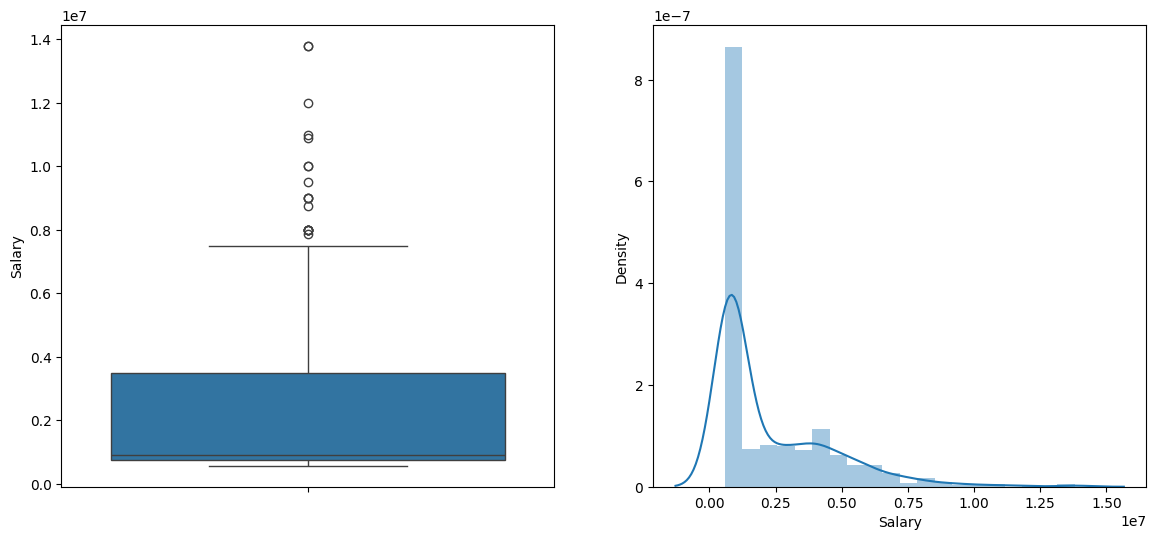

In [15]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(df['Salary'])
plt.subplot(1,2,2)
sns.distplot(df['Salary'], bins = 20)
plt.show()

In [16]:
# Examine the outliers below the lower bound-
df[df['Salary'] < 8.5]

,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,...,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G


In [17]:
#Examine potential outliers above the upper bound -
df.loc[df['Salary'] > 220.5, 'Position'].value_counts()

,count
Position,
D,203
C,96
RW,64
LW,52
C/LW,46
LW/C,34
C/RW,31
LW/RW,26
RW/LW,18


In [18]:
df.Position.value_counts()

,count
Position,
D,203
C,96
RW,64
LW,52
C/LW,46
LW/C,34
C/RW,31
LW/RW,26
RW/LW,18


In [19]:
df.City.value_counts()

,count
City,
Toronto,26
Edmonton,20
Winnipeg,10
Calgary,9
Ottawa,9
...,...
Vaughan,1
De Pere,1
Sundsvall,1


In [20]:
df['Pr/St'].value_counts()

,count
Pr/St,
ON,136
AB,42
QC,35
BC,29
MI,27
MN,26
SK,22
NY,21
MB,19


In [21]:
df['Cntry'].value_counts()

,count
Cntry,
CAN,291
USA,168
SWE,44
RUS,28
CZE,24
FIN,20
CHE,8
SVK,6
DNK,6


In [22]:
df['Nat'].value_counts()

,count
Nat,
CAN,289
USA,169
SWE,46
RUS,27
CZE,25
FIN,22
CHE,9
SVK,7
DNK,6


In [23]:
df = pd.concat([df.drop("Position", axis = 1), pd.get_dummies(df.Position, dtype=int).add_prefix('Position_')], axis=1)

In [24]:
df = pd.concat([df.drop("Pr/St", axis = 1), pd.get_dummies(df['Pr/St'], dtype=int).add_prefix('Pr/St_')], axis=1)

In [25]:
df = pd.concat([df.drop("City", axis = 1), pd.get_dummies(df.City, dtype=int).add_prefix('City_')], axis=1)

In [26]:
df = pd.concat([df.drop("Cntry", axis = 1), pd.get_dummies(df['Cntry'], dtype=int).add_prefix('Cntry_')], axis=1)

In [27]:
df = pd.concat([df.drop("Nat", axis = 1), pd.get_dummies(df['Nat'], dtype=int).add_prefix('Nat_')], axis=1)

In [28]:
df = pd.concat([df.drop("Hand", axis = 1), pd.get_dummies(df['Hand'], dtype=int).add_prefix('Hand_')], axis=1)

In [29]:
df = pd.concat([df.drop("Team", axis = 1), pd.get_dummies(df['Team'], dtype=int).add_prefix('Team_')], axis=1)

In [30]:
df

,Salary,Born,Ht,Wt,DftYr,DftRd,Ovrl,Last Name,First Name,GP,...,Team_PIT/TOR,Team_S.J,Team_STL,Team_STL/WSH,Team_T.B,Team_T.B/TOR,Team_TOR,Team_VAN,Team_WPG,Team_WSH
0,925000,97-01-30,74,190,2015.0,1.0,18.0,Chabot,Thomas,1,...,0,0,0,0,0,0,0,0,0,0
1,2250000,93-12-21,74,207,2012.0,1.0,15.0,Ceci,Cody,79,...,0,0,0,0,0,0,0,0,0,0
2,8000000,88-04-16,72,218,2006.0,1.0,7.0,Okposo,Kyle,65,...,0,0,0,0,0,0,0,0,0,0
3,3500000,92-01-07,77,220,2010.0,1.0,3.0,Gudbranson,Erik,30,...,0,0,0,0,0,0,0,1,0,0
4,1750000,94-03-29,76,217,2012.0,1.0,16.0,Wilson,Tom,82,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,600000,92-09-26,73,201,2011.0,3.0,82.0,Shore,Nick,70,...,0,0,0,0,0,0,0,0,0,0
608,9000000,85-01-21,74,206,2003.0,1.0,7.0,Suter,Ryan,82,...,0,0,0,0,0,0,0,0,0,0
609,4250000,87-03-30,73,205,2005.0,2.0,35.0,Vlasic,Marc-Edouard,75,...,0,1,0,0,0,0,0,0,0,0
610,7000000,82-10-31,71,196,2001.0,3.0,71.0,Plekanec,Tomas,78,...,0,0,0,0,0,0,0,0,0,0


In [31]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling directly to the 'Salary'
scaler = MinMaxScaler()
df['Salary_Normalized'] = scaler.fit_transform(df[['Salary']])

print(df.head())

    Salary      Born  Ht   Wt   DftYr  DftRd  Ovrl   Last Name First Name  GP  \
0   925000  97-01-30  74  190  2015.0    1.0  18.0      Chabot     Thomas   1   
1  2250000  93-12-21  74  207  2012.0    1.0  15.0        Ceci       Cody  79   
2  8000000  88-04-16  72  218  2006.0    1.0   7.0      Okposo       Kyle  65   
3  3500000  92-01-07  77  220  2010.0    1.0   3.0  Gudbranson       Erik  30   
4  1750000  94-03-29  76  217  2012.0    1.0  16.0      Wilson        Tom  82   

   ...  Team_S.J  Team_STL  Team_STL/WSH  Team_T.B  Team_T.B/TOR  Team_TOR  \
0  ...         0         0             0         0             0         0   
1  ...         0         0             0         0             0         0   
2  ...         0         0             0         0             0         0   
3  ...         0         0             0         0             0         0   
4  ...         0         0             0         0             0         0   

   Team_VAN  Team_WPG  Team_WSH  Salary_Norm

In [32]:
print(df.columns)

Index(['Salary', 'Born', 'Ht', 'Wt', 'DftYr', 'DftRd', 'Ovrl', 'Last Name',
       'First Name', 'GP',
       ...
       'Team_S.J', 'Team_STL', 'Team_STL/WSH', 'Team_T.B', 'Team_T.B/TOR',
       'Team_TOR', 'Team_VAN', 'Team_WPG', 'Team_WSH', 'Salary_Normalized'],
      dtype='object', length=680)


In [33]:
from sklearn.preprocessing import StandardScaler

# Apply Standard Scaling
scaler = StandardScaler()
df['Salary_Standardized'] = scaler.fit_transform(df[['Salary']])

print(df.head())


    Salary      Born  Ht   Wt   DftYr  DftRd  Ovrl   Last Name First Name  GP  \
0   925000  97-01-30  74  190  2015.0    1.0  18.0      Chabot     Thomas   1   
1  2250000  93-12-21  74  207  2012.0    1.0  15.0        Ceci       Cody  79   
2  8000000  88-04-16  72  218  2006.0    1.0   7.0      Okposo       Kyle  65   
3  3500000  92-01-07  77  220  2010.0    1.0   3.0  Gudbranson       Erik  30   
4  1750000  94-03-29  76  217  2012.0    1.0  16.0      Wilson        Tom  82   

   ...  Team_STL  Team_STL/WSH  Team_T.B  Team_T.B/TOR  Team_TOR  Team_VAN  \
0  ...         0             0         0             0         0         0   
1  ...         0             0         0             0         0         0   
2  ...         0             0         0             0         0         0   
3  ...         0             0         0             0         0         1   
4  ...         0             0         0             0         0         0   

   Team_WPG  Team_WSH  Salary_Normalized  Sa

In [34]:
df = df.drop("Born", axis = 1)

In [35]:
df = df.drop("First Name", axis = 1)

In [36]:
df.columns.values

array(['Salary', 'Ht', 'Wt', 'DftYr', 'DftRd', 'Ovrl', 'Last Name', 'GP',
       'G', 'A', 'A1', 'A2', 'PTS', '+/-', 'E+/-', 'PIM', 'Shifts', 'TOI',
       'TOIX', 'TOI/GP', 'TOI/GP.1', 'TOI%', 'IPP%', 'SH%', 'SV%', 'PDO',
       'F/60', 'A/60', 'Pct%', 'Diff', 'Diff/60', 'iCF', 'iCF.1', 'iFF',
       'iSF', 'iSF.1', 'iSF.2', 'ixG', 'iSCF', 'iRB', 'iRS', 'iDS',
       'sDist', 'sDist.1', 'Pass', 'iHF', 'iHF.1', 'iHA', 'iHDf', 'iMiss',
       'iGVA', 'iTKA', 'iBLK', 'iGVA.1', 'iTKA.1', 'iBLK.1', 'BLK%',
       'iFOW', 'iFOL', 'iFOW.1', 'iFOL.1', 'FO%', '%FOT', 'dzFOW',
       'dzFOL', 'nzFOW', 'nzFOL', 'ozFOW', 'ozFOL', 'FOW.Up', 'FOL.Up',
       'FOW.Down', 'FOL.Down', 'FOW.Close', 'FOL.Close', 'OTG', '1G',
       'GWG', 'ENG', 'PSG', 'PSA', 'G.Bkhd', 'G.Dflct', 'G.Slap',
       'G.Snap', 'G.Tip', 'G.Wrap', 'G.Wrst', 'CBar ', 'Post', 'Over',
       'Wide', 'S.Bkhd', 'S.Dflct', 'S.Slap', 'S.Snap', 'S.Tip', 'S.Wrap',
       'S.Wrst', 'iPenT', 'iPenD', 'iPENT', 'iPEND', 'iPenDf', 'NPD',
 

In [37]:
df = df.drop("Last Name", axis = 1)

In [38]:
# Temporarily limit the number of displayed columns to 5
with pd.option_context('display.max_columns', 10):
    print(df)

      Salary  Ht   Wt   DftYr  DftRd  ...  Team_VAN  Team_WPG  Team_WSH  \
0     925000  74  190  2015.0    1.0  ...         0         0         0   
1    2250000  74  207  2012.0    1.0  ...         0         0         0   
2    8000000  72  218  2006.0    1.0  ...         0         0         0   
3    3500000  77  220  2010.0    1.0  ...         1         0         0   
4    1750000  76  217  2012.0    1.0  ...         0         0         1   
..       ...  ..  ...     ...    ...  ...       ...       ...       ...   
607   600000  73  201  2011.0    3.0  ...         0         0         0   
608  9000000  74  206  2003.0    1.0  ...         0         0         0   
609  4250000  73  205  2005.0    2.0  ...         0         0         0   
610  7000000  71  196  2001.0    3.0  ...         0         0         0   
611   925000  78  226  2012.0    3.0  ...         0         0         0   

     Salary_Normalized  Salary_Standardized  
0             0.026465            -0.599464  
1      

In [39]:
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
correlation_matrix

,Salary,Ht,Wt,DftYr,DftRd,Ovrl,GP,G,A,A1,...,Team_STL,Team_STL/WSH,Team_T.B,Team_T.B/TOR,Team_TOR,Team_VAN,Team_WPG,Team_WSH,Salary_Normalized,Salary_Standardized
Salary,1.000000,0.083907,0.179856,-0.471547,-0.206641,-0.222808,0.478480,0.535625,0.627497,0.599064,...,0.074675,-0.025157,-0.029555,-0.004789,-0.023291,-0.074521,-0.024062,0.057061,1.000000,1.000000
Ht,0.083907,1.000000,0.719970,0.017413,-0.227397,-0.236629,0.098616,-0.035244,0.024310,-0.000595,...,0.028603,0.058711,-0.093530,0.097639,0.030850,0.038757,0.016069,0.034816,0.083907,0.083907
Wt,0.179856,0.719970,1.000000,-0.170491,-0.161085,-0.173605,0.137339,-0.020688,0.017141,0.005657,...,0.062959,0.006106,-0.110939,0.117127,0.040494,0.037301,0.000739,0.040153,0.179856,0.179856
DftYr,-0.471547,0.017413,-0.170491,1.000000,-0.146276,-0.153886,-0.312223,-0.138817,-0.179381,-0.169683,...,-0.006883,0.042015,0.058046,-0.057715,0.052532,0.045758,0.031837,-0.077827,-0.471547,-0.471547
DftRd,-0.206641,-0.227397,-0.161085,-0.146276,1.000000,0.988873,-0.118614,-0.192461,-0.232566,-0.230600,...,-0.054010,-0.015695,0.082768,-0.038017,0.036709,-0.032746,-0.061637,-0.032417,-0.206641,-0.206641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Team_VAN,-0.074521,0.038757,0.037301,0.045758,-0.032746,-0.032398,-0.072381,-0.073833,-0.082518,-0.069608,...,-0.035372,-0.007994,-0.037250,-0.007994,-0.032377,1.000000,-0.032377,-0.033402,-0.074521,-0.074521
Team_WPG,-0.024062,0.016069,0.000739,0.031837,-0.061637,-0.064148,0.028844,0.078506,0.058366,0.063496,...,-0.029328,-0.006629,-0.030885,-0.006629,-0.026846,-0.032377,1.000000,-0.027695,-0.024062,-0.024062
Team_WSH,0.057061,0.034816,0.040153,-0.077827,-0.032417,-0.026800,0.053792,0.044235,0.088984,0.068005,...,-0.030256,-0.006838,-0.031863,-0.006838,-0.027695,-0.033402,-0.027695,1.000000,0.057061,0.057061
Salary_Normalized,1.000000,0.083907,0.179856,-0.471547,-0.206641,-0.222808,0.478480,0.535625,0.627497,0.599064,...,0.074675,-0.025157,-0.029555,-0.004789,-0.023291,-0.074521,-0.024062,0.057061,1.000000,1.000000


In [40]:
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical features only
correlation_matrix = numerical_df.corr()

# Get correlations with 'Salary' and sort
correlation = correlation_matrix['Salary'].sort_values(ascending=False).abs()

sorted_correlation = correlation.sort_values(ascending=False)
num_cols_to_drop = int(0.99 * len(df.columns))
cols_to_drop = sorted_correlation.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)

In [41]:
df_dropped

,Game,Pr/St_CT,Pr/St_PA,City_Meadow Lake,City_Ostrava,City_Strasbourg,Team_ARI/MIN
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
607,0,0,0,0,0,0,0
608,0,0,0,0,0,0,0
609,1,0,0,0,0,0,0
610,0,0,0,0,0,0,0


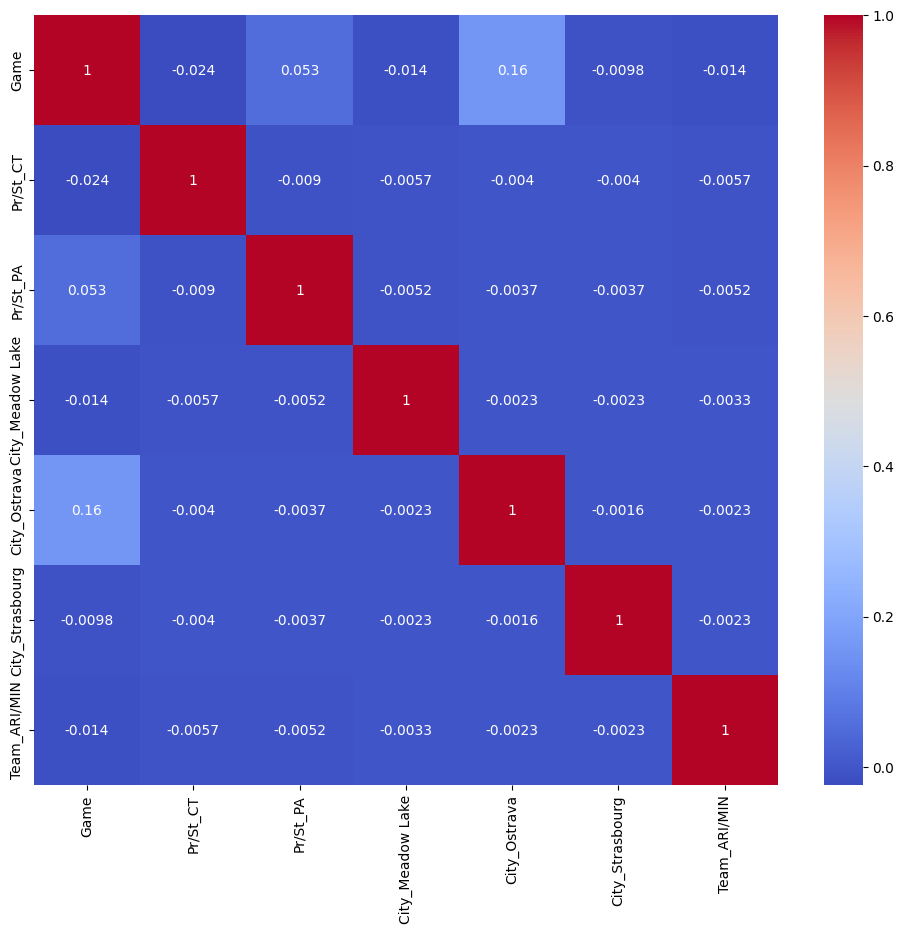

In [42]:
# Calculate the correlation matrix for numerical features only
correlation_matrix = df_dropped.corr()

# Display the heatmap using the correlation matrix of numerical features
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Use correlation_matrix here
plt.show()

In [43]:
correlation_matrix.columns.values

array(['Game', 'Pr/St_CT', 'Pr/St_PA', 'City_Meadow Lake', 'City_Ostrava',
       'City_Strasbourg', 'Team_ARI/MIN'], dtype=object)

In [44]:
df = df[['Salary', 'GS' ,'TOI/GP', 'GS/G', 'TOI%', 'OTOI', 'Grit', 'SH%', 'Pace']]
cc = df.corr()
type(cc)
cc

,Salary,GS,TOI/GP,GS/G,TOI%,OTOI,Grit,SH%,Pace
Salary,1.000000,0.633176,0.596312,0.547928,0.562691,0.446988,0.347065,0.253978,0.280558
GS,0.633176,1.000000,0.639578,0.880012,0.602714,0.697088,0.354807,0.417043,0.369053
TOI/GP,0.596312,0.639578,1.000000,0.580047,0.990691,0.527341,0.521508,0.342733,0.279093
GS/G,0.547928,0.880012,0.580047,1.000000,0.558514,0.537523,0.235570,0.449083,0.351169
TOI%,0.562691,0.602714,0.990691,0.558514,1.000000,0.482399,0.508071,0.352557,0.260408
OTOI,0.446988,0.697088,0.527341,0.537523,0.482399,1.000000,0.684002,0.301170,0.242065
Grit,0.347065,0.354807,0.521508,0.235570,0.508071,0.684002,1.000000,0.159230,0.169257
SH%,0.253978,0.417043,0.342733,0.449083,0.352557,0.301170,0.159230,1.000000,0.249143
Pace,0.280558,0.369053,0.279093,0.351169,0.260408,0.242065,0.169257,0.249143,1.000000


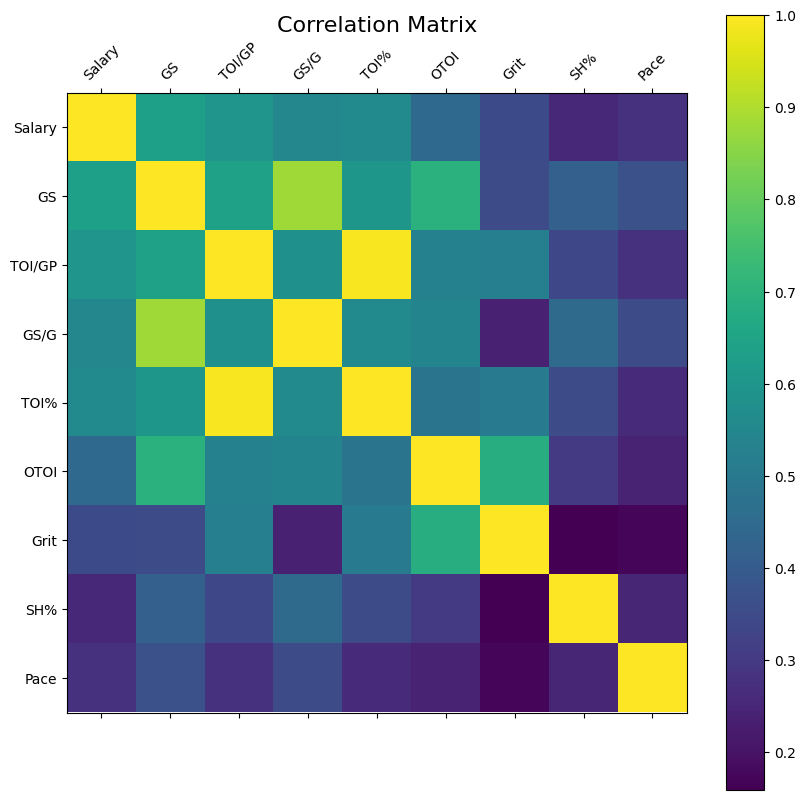

In [45]:
f = plt.figure(figsize=(10, 10))
plt.matshow(cc, fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=16);

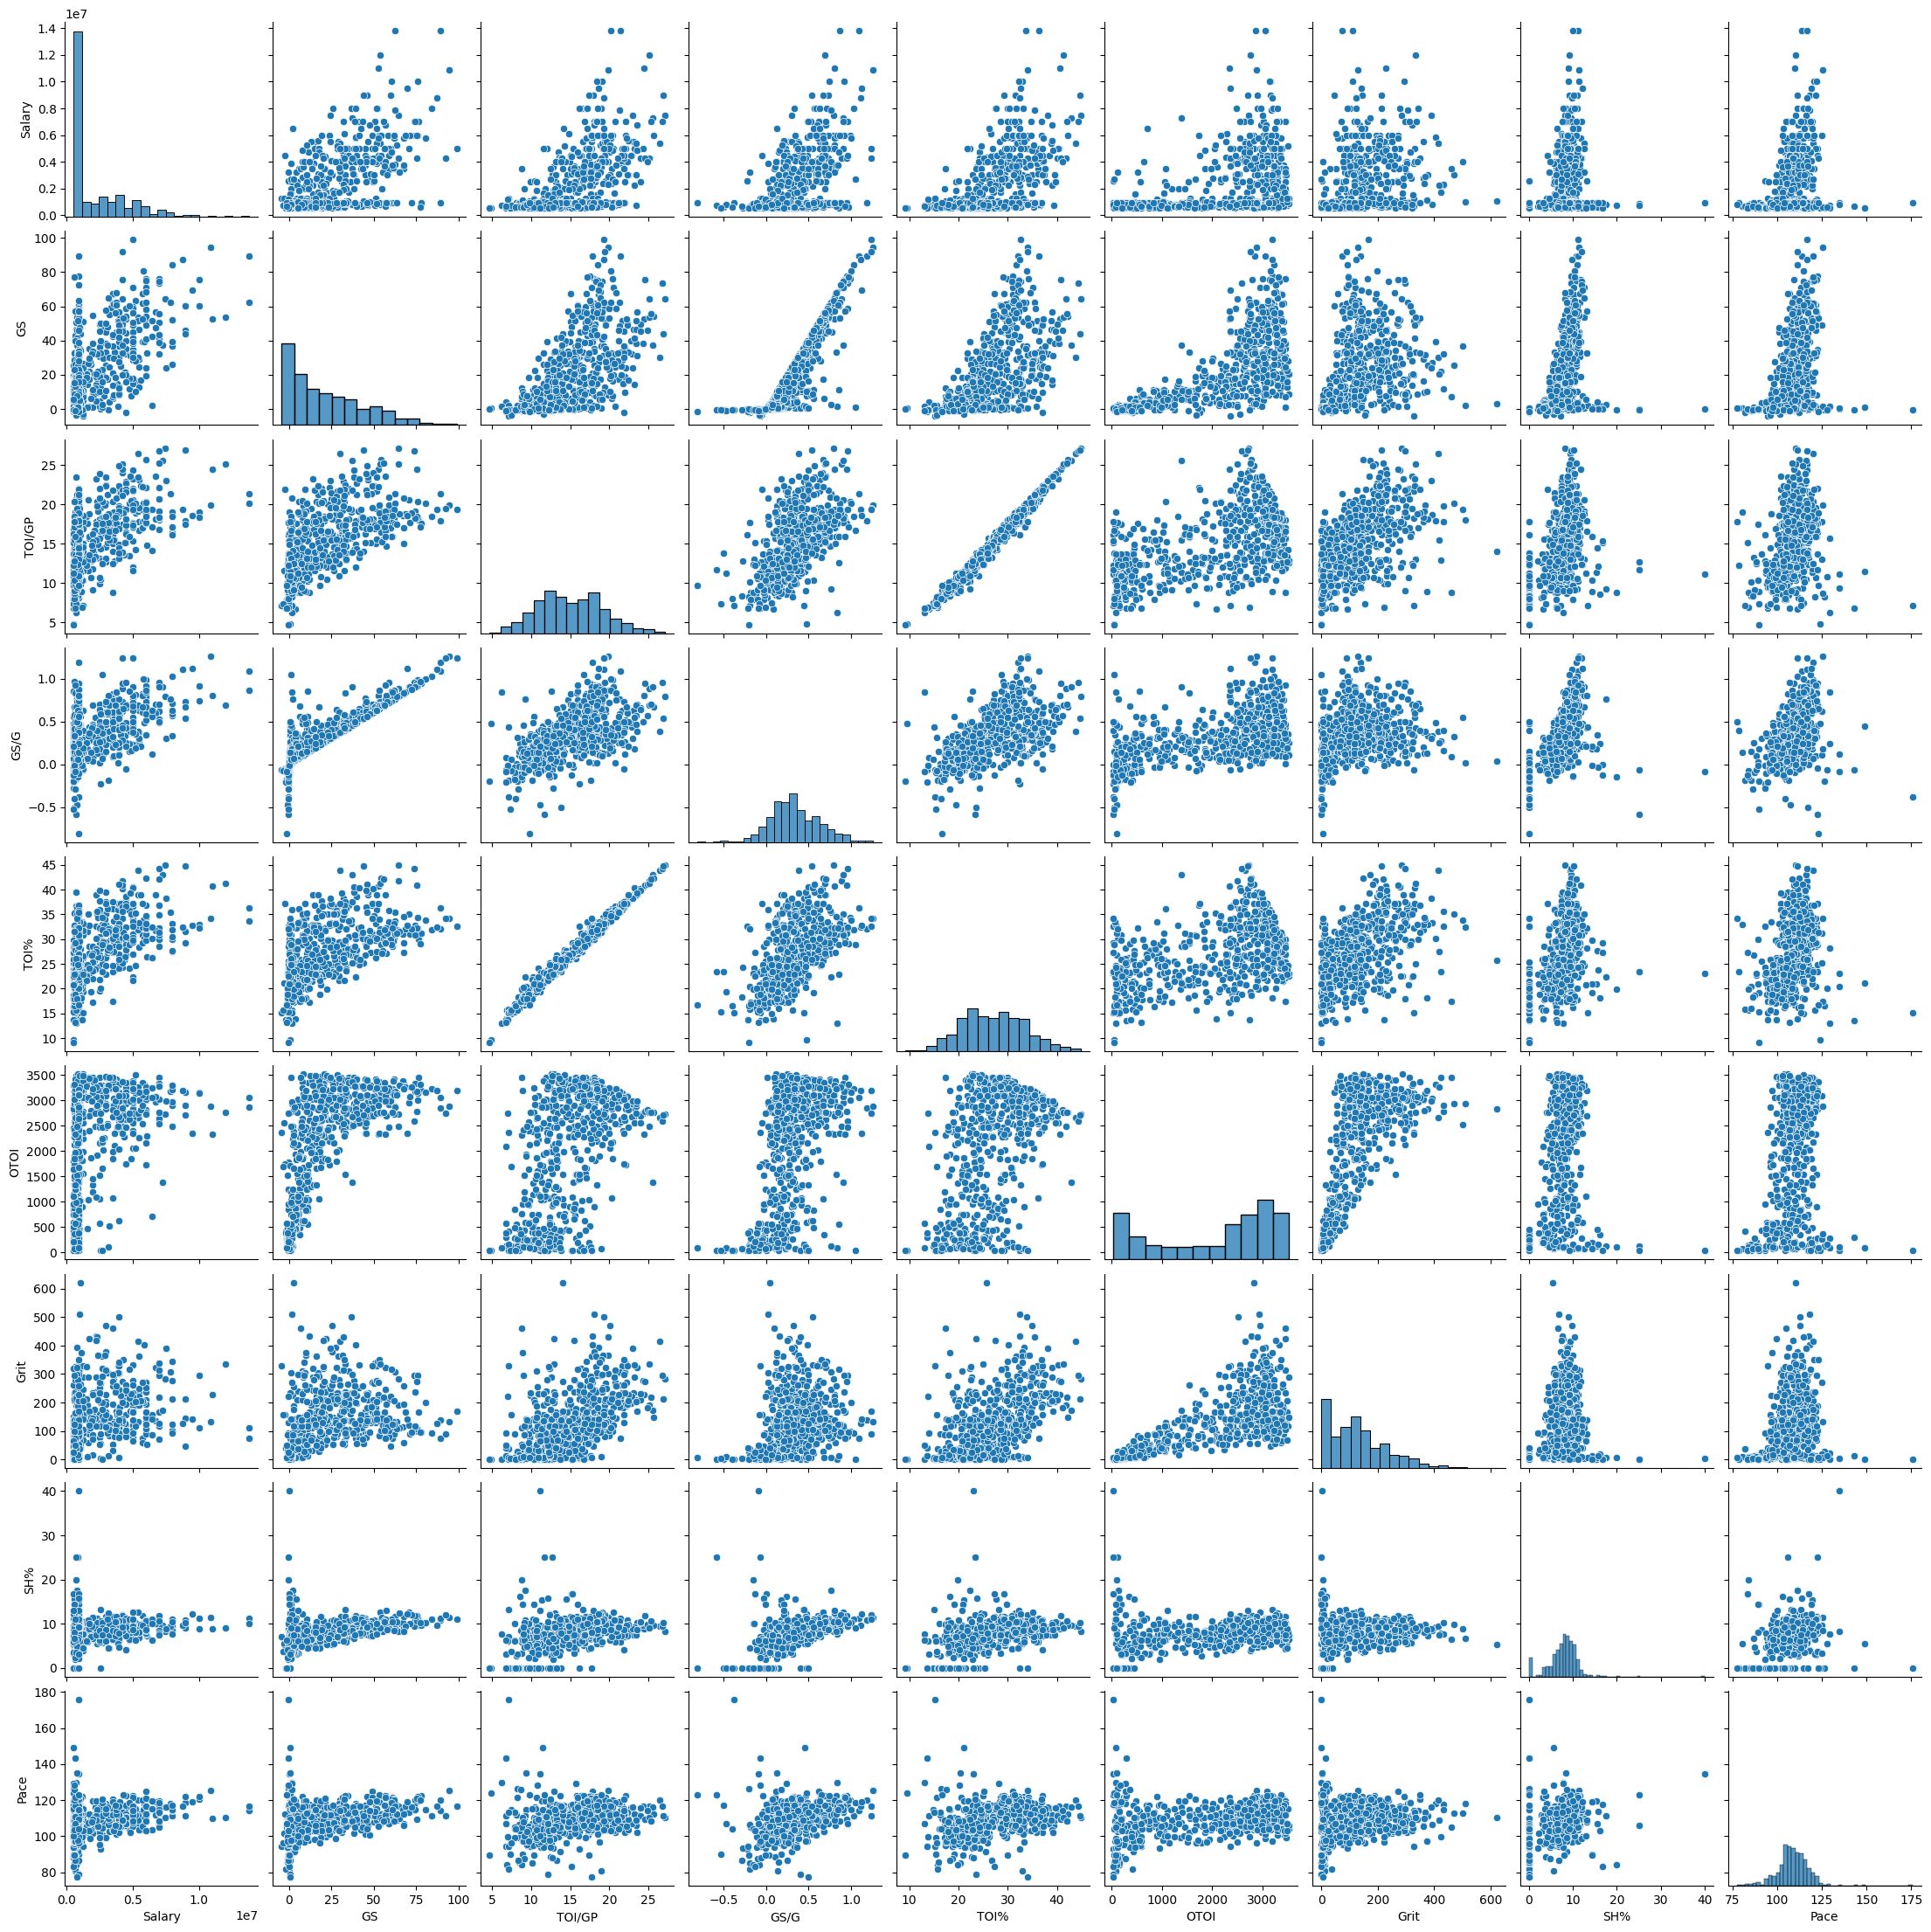

In [46]:
sb.pairplot(df)

In [47]:
df.shape

(612, 9)

In [48]:
X = df.iloc[:,1:9]
Y = df.iloc[:,0]
print(X.shape)
print(Y.shape)

(612, 8)
(612,)


In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42, test_size = 0.3)
print("Splitting data...")

Splitting data...


In [50]:
X_train # 70%

,GS,TOI/GP,GS/G,TOI%,OTOI,Grit,SH%,Pace
167,28.4,21.67,0.40,36.6,2645.21,233,9.4,116.7
54,5.8,8.78,0.30,17.8,767.24,53,3.4,108.1
577,0.1,13.72,0.03,24.3,85.45,1,11.1,105.0
46,-0.5,13.52,-0.01,25.6,1249.62,129,9.8,99.7
93,61.5,17.60,0.76,29.6,3392.51,132,10.2,111.8
...,...,...,...,...,...,...,...,...
71,-0.2,16.13,-0.23,32.5,33.51,2,0.0,93.1
106,74.4,19.13,0.92,32.7,3179.57,237,10.8,120.0
270,15.3,13.17,0.20,23.8,3160.02,164,5.4,105.6
435,21.3,18.28,0.30,31.7,2790.55,236,6.5,120.9


In [51]:
X_test # 30%

,GS,TOI/GP,GS/G,TOI%,OTOI,Grit,SH%,Pace
81,59.1,16.95,0.72,30.0,3234.73,121,10.8,110.2
218,18.6,13.02,0.38,22.9,2143.25,56,6.0,103.9
55,-0.4,7.88,-0.15,16.1,123.46,3,10.0,104.0
600,30.1,21.82,0.37,37.1,3030.45,260,8.7,114.2
264,4.1,14.50,0.34,27.6,456.50,5,15.6,106.9
...,...,...,...,...,...,...,...,...
370,17.9,20.10,0.24,35.7,2632.47,216,6.5,110.0
259,2.7,10.77,0.05,19.7,2318.94,255,4.4,102.8
301,26.7,14.88,0.40,25.8,2806.11,92,8.3,108.1
228,18.6,12.68,0.23,22.8,3476.82,139,8.0,99.4


In [52]:
Y_train # 70%

,Salary
167,5000000
54,792500
577,925000
46,700000
93,3575000
...,...
71,2600000
106,6000000
270,1150000
435,1100000


In [53]:
Y_test # 30%

,Salary
81,3400000
218,842500
55,600000
600,5000000
264,600000
...,...
370,4750000
259,800000
301,600000
228,3000000


In [54]:
X_train = X_train.dropna()  # Drop rows with any NaN values in X_train
Y_train = Y_train[X_train.index]  # Update Y_train to match the remaining rows in X_train

model = LinearRegression()
model = model.fit(X_train, Y_train)

In [55]:
# display the values of intercept and slope calculated by the Linear Regression Algorithm for our dataset
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 40082.05358059984
slope: [ 4.37202163e+04  7.75143136e+05 -1.22567986e+04 -3.98114440e+05
 -2.74548354e+02  2.11266929e+03 -7.13195032e+03  6.39578453e+03]


In [56]:
# Impute missing values using the mean for each column in X_test
X_test = X_test.fillna(X_test.mean())

# OR

# Drop rows with missing values in X_test
X_test = X_test.dropna()

# make predictions for Heating_Oil consumption by using the
# X_test(Temperature, Num_Occupants, Avg_Age, Home_Size, Insulation) data
Y_pred = model.predict(X_test)
Y_pred # print the prediction results

array([3805698.48894887, 1975777.48973196,  289202.27778826,
       3880742.65083482,  924467.53378238,  740667.97709319,
       3639247.21161965, 4013273.22200181, 3725983.3640808 ,
       2599983.30614678, 4980988.65979836, 3896416.41178373,
       3500088.08893028,  675577.09166683,  811261.85665304,
        352112.29211177, 1832359.24473357, 5019069.22355402,
        648415.49015809, 3366692.27350761, 1790209.21637709,
        627263.69134085, -116132.01577859, 3480169.03644851,
       3437447.757518  , 2008686.41225317, 3689441.44077585,
       3144260.180985  , 5610875.06594405, 5172828.95477992,
       3890199.11327964, 4144943.15644548, 3747656.32667745,
       -224342.4124887 ,  989046.87543744, 2692000.47989688,
       4377836.18570947, 1530740.75557761, 2893850.87806264,
       4045077.50579409, 1395978.6123547 ,  477598.9228011 ,
       1044751.29724406,  362859.36101174, 1827579.75748728,
       5383970.57323401,  908723.28979297, 2315174.73023475,
        634820.32647914,

In [57]:
# compare the actual values(Y_test 30%) with the predicted values(Y_pred)
results = pd.DataFrame({'Actual Values': Y_test.values.flatten(), 'Predicted Values' : Y_pred.flatten()})
results.head()

,Actual Values,Predicted Values
0,3400000,3.805698e+06
1,842500,1.975777e+06
2,600000,2.892023e+05
3,5000000,3.880743e+06
4,600000,9.244675e+05


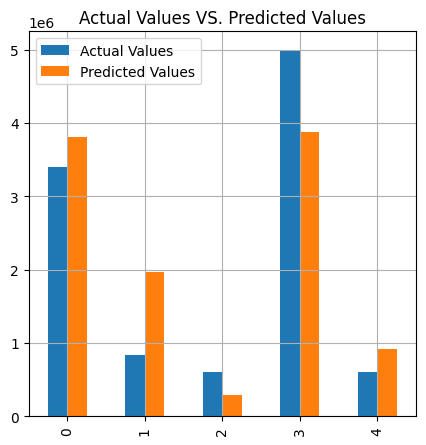

In [58]:
# compare the actual and predicted values using bar graph
results = results.head()
results.plot(kind = 'bar', figsize = (5,5))
plt.title('Actual Values VS. Predicted Values', fontsize=12);
plt.grid()

In [59]:
from sklearn.metrics import r2_score

# getting the r2; Measures of accuracy
score = r2_score(Y_test, Y_pred)
print('Coefficient of Determination: {}'.format(score*100))

Coefficient of Determination: 50.80486236381554


#Analyze Feature Importance:

In [60]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/sample_data/train.csv', delimiter=',', encoding='latin-1')

X = df[['Salary','GS', 'TOI/GP', 'GS/G', 'TOI%', 'OTOI', 'Grit', 'SH%', 'Pace']]
Y = df['Salary']

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.3)

# Create and train the Linear Regression model
model = LinearRegression()  # Define the model
X_train = X_train.dropna()  # Drop rows with any NaN values in X_train
Y_train = Y_train[X_train.index]  # Update Y_train to match the remaining rows in X_train
model.fit(X_train, Y_train)  # Fit the model

# Now you can access model.coef_
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

feature_importance

,Feature,Coefficient
0,Salary,1.000000e+00
3,GS/G,1.783496e-11
4,TOI%,2.985140e-12
1,GS,3.970696e-13
5,OTOI,3.531516e-15
6,Grit,-1.403655e-13
8,Pace,-1.010811e-12
7,SH%,-1.147566e-12
2,TOI/GP,-5.838257e-12


In [61]:
X.columns.values

array(['Salary', 'GS', 'TOI/GP', 'GS/G', 'TOI%', 'OTOI', 'Grit', 'SH%',
       'Pace'], dtype=object)

#Interaction Features

In [62]:
X['TOI_GS'] = df['TOI%'] * df['GS']

In [63]:
X['TOI_SH'] = df['TOI/GP'] * df['SH%']

In [64]:
X['IPP_Pace'] = df['IPP%'] * df['Pace']

#Polynomial Features

In [65]:
X['TOI_squared'] = df['TOI%'] ** 2
X['GS_squared'] = df['GS'] ** 2


In [66]:
X['SH_cubed'] = df['SH%'] ** 3


#Ratios

In [67]:
X['TOI_GP_to_GS'] = df['TOI/GP'] / (df['GS'] + 1e-6)  # Add a small value to avoid division by zero


In [68]:
X['SH_PDO'] = df['SH%'] / (df['PDO'] + 1e-6)


In [69]:
X['Pace_TOI'] = df['Pace'] / (df['TOI%'] + 1e-6)


#Logarithmic Transformations

In [70]:
import numpy as np
X['log_Salary'] = np.log(df['Salary'] + 1)  # Add 1 to avoid log(0)


In [71]:
X['log_GS'] = np.log(df['GS'] + 1)


#Feature Binning

In [72]:
X['GS_bin'] = pd.cut(df['GS'], bins=[0, 50, 100, 150], labels=[0, 1, 2])

#Interaction with Target

In [73]:
X['Salary_minus_GS'] = df['Salary'] - df['GS'] * 1000


In [74]:
X.columns.values

array(['Salary', 'GS', 'TOI/GP', 'GS/G', 'TOI%', 'OTOI', 'Grit', 'SH%',
       'Pace', 'TOI_GS', 'TOI_SH', 'IPP_Pace', 'TOI_squared',
       'GS_squared', 'SH_cubed', 'TOI_GP_to_GS', 'SH_PDO', 'Pace_TOI',
       'log_Salary', 'log_GS', 'GS_bin', 'Salary_minus_GS'], dtype=object)

#Normalize or scale the new features

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[['TOI_GS', 'TOI_squared', 'SH_PDO']] = scaler.fit_transform(X[['TOI_GS', 'TOI_squared', 'SH_PDO']])


In [76]:
X

,Salary,GS,TOI/GP,GS/G,TOI%,OTOI,Grit,SH%,Pace,TOI_GS,...,TOI_squared,GS_squared,SH_cubed,TOI_GP_to_GS,SH_PDO,Pace_TOI,log_Salary,log_GS,GS_bin,Salary_minus_GS
0,925000,-0.4,7.15,-0.38,15.2,40.03,1,0.0,175.7,0.022603,...,0.075801,0.16,0.000,-17.875045,0.000000,11.559210,13.737550,-0.510826,NaN,925400.0
1,2250000,14.1,23.20,0.18,39.0,2850.59,290,7.4,112.5,0.188959,...,0.743700,198.81,405.224,1.645390,0.235131,2.884615,14.626441,2.714695,0,2235900.0
2,8000000,36.8,18.97,0.57,33.1,2486.75,102,9.7,114.8,0.388887,...,0.523447,1354.24,912.673,0.515489,0.295657,3.468278,15.894952,3.632309,0,7963200.0
3,3500000,5.9,20.33,0.20,36.1,1074.41,130,6.2,105.1,0.088151,...,0.630936,34.81,238.328,3.445762,0.203165,2.911357,15.068274,1.931521,0,3494100.0
4,1750000,21.8,12.93,0.27,23.5,3459.09,425,7.8,99.5,0.177709,...,0.242113,475.24,474.552,0.593119,0.246347,4.234042,14.375127,3.126761,0,1728200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,600000,23.2,12.78,0.33,22.8,3023.36,100,6.6,103.6,0.182694,...,0.225332,538.24,287.496,0.550862,0.210563,4.543859,13.304687,3.186353,0,576800.0
608,9000000,44.1,26.93,0.54,44.7,2715.54,213,10.2,111.3,0.614252,...,0.990722,1944.81,1061.208,0.610658,0.311501,2.489933,16.012735,3.808882,0,8955900.0
609,4250000,32.5,21.07,0.43,35.5,2855.83,200,9.2,108.8,0.369639,...,0.608692,1056.25,778.688,0.648308,0.289110,3.064789,15.262430,3.511545,0,4217500.0
610,7000000,38.7,16.82,0.50,28.5,3287.74,126,7.5,113.2,0.354439,...,0.376733,1497.69,421.875,0.434625,0.236397,3.971930,15.761421,3.681351,0,6961300.0


In [77]:
cc = X.corr()
type(cc)
cc

,Salary,GS,TOI/GP,GS/G,TOI%,OTOI,Grit,SH%,Pace,TOI_GS,...,TOI_squared,GS_squared,SH_cubed,TOI_GP_to_GS,SH_PDO,Pace_TOI,log_Salary,log_GS,GS_bin,Salary_minus_GS
Salary,1.000000,0.633176,0.596312,0.547928,0.562691,0.446988,0.347065,0.253978,0.280558,0.668755,...,0.574042,0.598399,0.006881,-0.062843,0.271331,-0.407532,0.937080,0.525068,0.472940,0.999971
GS,0.633176,1.000000,0.639578,0.880012,0.602714,0.697088,0.354807,0.417043,0.369053,0.982157,...,0.587521,0.936994,0.018254,-0.099683,0.441182,-0.462593,0.635235,0.839121,0.773118,0.627232
TOI/GP,0.596312,0.639578,1.000000,0.580047,0.990691,0.527341,0.521508,0.342733,0.279093,0.712746,...,0.984007,0.518852,-0.002386,-0.050847,0.375348,-0.833835,0.642030,0.642781,0.379953,0.593593
GS/G,0.547928,0.880012,0.580047,1.000000,0.558514,0.537523,0.235570,0.449083,0.351169,0.859081,...,0.535676,0.811833,-0.011278,-0.113334,0.479990,-0.436099,0.541827,0.823373,0.720685,0.542639
TOI%,0.562691,0.602714,0.990691,0.558514,1.000000,0.482399,0.508071,0.352557,0.260408,0.678214,...,0.989344,0.487216,0.015173,-0.041740,0.383655,-0.858557,0.608315,0.609674,0.354636,0.560237
OTOI,0.446988,0.697088,0.527341,0.537523,0.482399,1.000000,0.684002,0.301170,0.242065,0.645646,...,0.453942,0.507804,-0.075489,-0.148053,0.335518,-0.426141,0.538208,0.840230,0.338947,0.442880
Grit,0.347065,0.354807,0.521508,0.235570,0.508071,0.684002,1.000000,0.159230,0.169257,0.375622,...,0.515335,0.208101,-0.072661,-0.103101,0.185235,-0.403940,0.430328,0.515491,0.092363,0.344864
SH%,0.253978,0.417043,0.342733,0.449083,0.352557,0.301170,0.159230,1.000000,0.249143,0.403474,...,0.321980,0.354561,0.611715,0.028205,0.991048,-0.319000,0.274209,0.412456,0.366536,0.251436
Pace,0.280558,0.369053,0.279093,0.351169,0.260408,0.242065,0.169257,0.249143,1.000000,0.363919,...,0.254957,0.331842,0.139981,-0.033511,0.243898,0.128206,0.277007,0.316193,0.293166,0.278657
TOI_GS,0.668755,0.982157,0.712746,0.859081,0.678214,0.645646,0.375622,0.403474,0.363919,1.000000,...,0.680412,0.935239,0.022329,-0.091462,0.426371,-0.502248,0.658528,0.798881,0.772437,0.663209


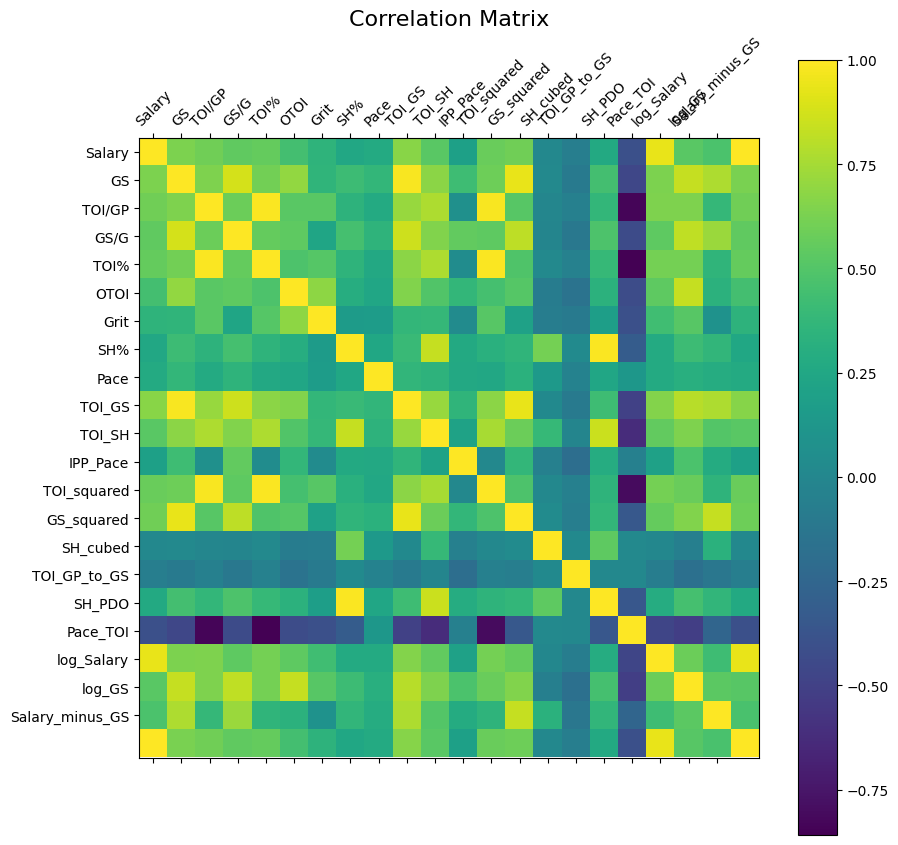

In [78]:
f = plt.figure(figsize=(10, 10))
plt.matshow(cc, fignum=f.number)
plt.xticks(range(X.select_dtypes(['number']).shape[1]), X.select_dtypes(['number']).columns, fontsize=10, rotation=45)
plt.yticks(range(X.select_dtypes(['number']).shape[1]), X.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=16);

In [79]:
df = X

In [80]:
df.shape

(612, 22)

In [81]:
df.columns.values

array(['Salary', 'GS', 'TOI/GP', 'GS/G', 'TOI%', 'OTOI', 'Grit', 'SH%',
       'Pace', 'TOI_GS', 'TOI_SH', 'IPP_Pace', 'TOI_squared',
       'GS_squared', 'SH_cubed', 'TOI_GP_to_GS', 'SH_PDO', 'Pace_TOI',
       'log_Salary', 'log_GS', 'GS_bin', 'Salary_minus_GS'], dtype=object)

In [82]:
df

,Salary,GS,TOI/GP,GS/G,TOI%,OTOI,Grit,SH%,Pace,TOI_GS,...,TOI_squared,GS_squared,SH_cubed,TOI_GP_to_GS,SH_PDO,Pace_TOI,log_Salary,log_GS,GS_bin,Salary_minus_GS
0,925000,-0.4,7.15,-0.38,15.2,40.03,1,0.0,175.7,0.022603,...,0.075801,0.16,0.000,-17.875045,0.000000,11.559210,13.737550,-0.510826,NaN,925400.0
1,2250000,14.1,23.20,0.18,39.0,2850.59,290,7.4,112.5,0.188959,...,0.743700,198.81,405.224,1.645390,0.235131,2.884615,14.626441,2.714695,0,2235900.0
2,8000000,36.8,18.97,0.57,33.1,2486.75,102,9.7,114.8,0.388887,...,0.523447,1354.24,912.673,0.515489,0.295657,3.468278,15.894952,3.632309,0,7963200.0
3,3500000,5.9,20.33,0.20,36.1,1074.41,130,6.2,105.1,0.088151,...,0.630936,34.81,238.328,3.445762,0.203165,2.911357,15.068274,1.931521,0,3494100.0
4,1750000,21.8,12.93,0.27,23.5,3459.09,425,7.8,99.5,0.177709,...,0.242113,475.24,474.552,0.593119,0.246347,4.234042,14.375127,3.126761,0,1728200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,600000,23.2,12.78,0.33,22.8,3023.36,100,6.6,103.6,0.182694,...,0.225332,538.24,287.496,0.550862,0.210563,4.543859,13.304687,3.186353,0,576800.0
608,9000000,44.1,26.93,0.54,44.7,2715.54,213,10.2,111.3,0.614252,...,0.990722,1944.81,1061.208,0.610658,0.311501,2.489933,16.012735,3.808882,0,8955900.0
609,4250000,32.5,21.07,0.43,35.5,2855.83,200,9.2,108.8,0.369639,...,0.608692,1056.25,778.688,0.648308,0.289110,3.064789,15.262430,3.511545,0,4217500.0
610,7000000,38.7,16.82,0.50,28.5,3287.74,126,7.5,113.2,0.354439,...,0.376733,1497.69,421.875,0.434625,0.236397,3.971930,15.761421,3.681351,0,6961300.0


In [83]:
X = df.iloc[:,1:22]
Y = df.iloc[:,0]
print(X.shape)
print(Y.shape)

(612, 21)
(612,)


In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42, test_size = 0.3)
print("Splitting data...")

Splitting data...


In [85]:
X_train # 70%

,GS,TOI/GP,GS/G,TOI%,OTOI,Grit,SH%,Pace,TOI_GS,TOI_SH,...,TOI_squared,GS_squared,SH_cubed,TOI_GP_to_GS,SH_PDO,Pace_TOI,log_Salary,log_GS,GS_bin,Salary_minus_GS
167,28.4,21.67,0.40,36.6,2645.21,233,9.4,116.7,0.335436,203.698,...,0.649756,806.56,830.584,0.763028,0.286791,3.188525,15.424949,3.380995,0,4971600.0
54,5.8,8.78,0.30,17.8,767.24,53,3.4,108.1,0.055313,29.852,...,0.120226,33.64,39.304,1.513793,0.111763,6.073033,13.582949,1.916923,0,786700.0
577,0.1,13.72,0.03,24.3,85.45,1,11.1,105.0,0.025149,152.292,...,0.261913,0.01,1367.631,137.198628,0.313967,4.320987,13.737550,0.095310,0,924900.0
46,-0.5,13.52,-0.01,25.6,1249.62,129,9.8,99.7,0.020592,132.496,...,0.295500,0.25,941.192,-27.040054,0.303115,3.894531,13.458837,-0.693147,NaN,700500.0
93,61.5,17.60,0.76,29.6,3392.51,132,10.2,111.8,0.569109,179.520,...,0.409823,3782.25,1061.208,0.286179,0.321499,3.777027,15.089476,4.135167,1,3513500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.2,16.13,-0.23,32.5,33.51,2,0.0,93.1,0.022477,0.000,...,0.503068,0.04,0.000,-80.650403,0.000000,2.864615,14.771022,-0.223144,NaN,2600200.0
106,74.4,19.13,0.92,32.7,3179.57,237,10.8,120.0,0.752371,206.604,...,0.509819,5535.36,1259.712,0.257124,0.331436,3.669725,15.607270,4.322807,1,5925600.0
270,15.3,13.17,0.20,23.8,3160.02,164,5.4,105.6,0.133377,71.118,...,0.249460,234.09,157.464,0.860784,0.174763,4.436975,13.955273,2.791165,0,1134700.0
435,21.3,18.28,0.30,31.7,2790.55,236,6.5,120.9,0.226453,118.820,...,0.476475,453.69,274.625,0.858216,0.212773,3.813880,13.910822,3.104587,0,1078700.0


In [86]:
X_test # 30%

,GS,TOI/GP,GS/G,TOI%,OTOI,Grit,SH%,Pace,TOI_GS,TOI_SH,...,TOI_squared,GS_squared,SH_cubed,TOI_GP_to_GS,SH_PDO,Pace_TOI,log_Salary,log_GS,GS_bin,Salary_minus_GS
81,59.1,16.95,0.72,30.0,3234.73,121,10.8,110.2,0.554927,183.060,...,0.422167,3492.81,1259.712,0.286802,0.328230,3.673333,15.039286,4.096010,1,3340900.0
218,18.6,13.02,0.38,22.9,2143.25,56,6.0,103.9,0.151869,78.120,...,0.227698,345.96,216.000,0.700000,0.193782,4.537118,13.644130,2.975530,0,823900.0
55,-0.4,7.88,-0.15,16.1,123.46,3,10.0,104.0,0.022495,78.800,...,0.090387,0.16,1000.000,-19.700049,0.308997,6.459627,13.304687,-0.510826,NaN,600400.0
600,30.1,21.82,0.37,37.1,3030.45,260,8.7,114.2,0.358556,189.834,...,0.668836,906.01,658.503,0.724917,0.267251,3.078167,15.424949,3.437208,0,4969900.0
264,4.1,14.50,0.34,27.6,456.50,5,15.6,106.9,0.058281,226.200,...,0.350591,16.81,3796.416,3.536585,0.463794,3.873188,13.304687,1.629241,0,595900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,17.9,20.10,0.24,35.7,2632.47,216,6.5,110.0,0.215628,130.650,...,0.616065,320.41,274.625,1.122905,0.209931,3.081232,15.373655,2.939162,0,4732100.0
259,2.7,10.77,0.05,19.7,2318.94,255,4.4,102.8,0.040337,47.388,...,0.157116,7.29,85.184,3.988887,0.141380,5.218274,13.592368,1.308333,0,797300.0
301,26.7,14.88,0.40,25.8,2806.11,92,8.3,108.1,0.230538,123.504,...,0.300823,712.89,571.787,0.557303,0.263196,4.189922,13.304687,3.321432,0,573300.0
228,18.6,12.68,0.23,22.8,3476.82,139,8.0,99.4,0.151312,101.440,...,0.225332,345.96,512.000,0.681720,0.256008,4.359649,14.914123,2.975530,0,2981400.0


In [87]:
Y_train # 70%

,Salary
167,5000000
54,792500
577,925000
46,700000
93,3575000
...,...
71,2600000
106,6000000
270,1150000
435,1100000


In [88]:
Y_test # 30%

,Salary
81,3400000
218,842500
55,600000
600,5000000
264,600000
...,...
370,4750000
259,800000
301,600000
228,3000000


In [89]:
X_train = X_train.dropna()  # Drop rows with any NaN values in X_train
Y_train = Y_train[X_train.index]  # Update Y_train to match the remaining rows in X_train

model = LinearRegression()
model = model.fit(X_train, Y_train)

In [90]:
# display the values of intercept and slope calculated by the Linear Regression Algorithm for our dataset
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 9.313225746154785e-10
slope: [ 1.00000000e+03  6.93242130e-11  2.14112699e-10  8.80122756e-11
 -5.78969144e-14  1.32323688e-12  3.05644050e-10  1.26858319e-12
 -2.91445247e-10 -5.05773922e-12  2.01311480e-14  2.05885121e-10
  2.49710937e-13 -1.72645262e-13  2.90415604e-12 -6.84528300e-09
 -5.43557189e-11  4.22453858e-10  2.84551946e-11 -7.29211837e-12
  1.00000000e+00]


In [91]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Replace infinite values with NaN
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Separate numerical and categorical columns
numerical_columns = X_test.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X_test.select_dtypes(include=['object', 'category']).columns

# Impute missing values for numerical columns with the mean
num_imputer = SimpleImputer(strategy='mean')
X_test[numerical_columns] = num_imputer.fit_transform(X_test[numerical_columns])

# Impute missing values for categorical columns with the mode
cat_imputer = SimpleImputer(strategy='most_frequent')
X_test[categorical_columns] = cat_imputer.fit_transform(X_test[categorical_columns])

In [92]:
# Import required libraries
from sklearn.impute import SimpleImputer

# Separate numerical and categorical columns
numerical_columns = X_test.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X_test.select_dtypes(include=['object', 'category']).columns

# Impute missing values for numerical columns with the mean
num_imputer = SimpleImputer(strategy='mean')
X_test[numerical_columns] = num_imputer.fit_transform(X_test[numerical_columns])

# Check if there are any categorical columns before imputing
if len(categorical_columns) > 0:  # Only impute if there are categorical columns
    cat_imputer = SimpleImputer(strategy='most_frequent')
    X_test[categorical_columns] = cat_imputer.fit_transform(X_test[categorical_columns])

In [93]:
# Impute missing values using the mean for each column in X_test
X_test = X_test.fillna(X_test.mean())

# OR

# Drop rows with missing values in X_test
X_test = X_test.dropna()

# make predictions for Heating_Oil consumption by using the
# X_test(Temperature, Num_Occupants, Avg_Age, Home_Size, Insulation) data
Y_pred = model.predict(X_test)
Y_pred # print the prediction results

array([ 3400000.        ,   842500.00000001,   600000.00000001,
        4999999.99999999,   600000.00000001,   900000.00000001,
         925000.00000001,   792500.00000001,   925000.00000001,
         900000.00000001,  4999999.99999999,  3500000.        ,
        4249999.99999999,   575000.00000001,  2159416.66666709,
        1650000.        ,  1500000.        ,   925000.00000001,
         800000.00000001,  7999999.99999998,   925000.00000001,
         925000.00000001,   775000.00000001,  2950000.        ,
        3999999.99999999,  1100000.00000001,   750000.00000001,
         667500.00000001,  5999999.99999999,  9999999.99999997,
        3500000.        ,  5999999.99999999,  4999999.99999999,
         600000.00000001,   925000.00000001,  4499999.99999999,
        3750000.        ,   925000.00000001,  3550000.        ,
        5999999.99999999,   925000.00000001,   792500.00000001,
         874125.00000001,   575000.00000001,   800000.00000001,
        8999999.99999998,   925000.00000

In [94]:
# compare the actual values(Y_test 30%) with the predicted values(Y_pred)
results = pd.DataFrame({'Actual Values': Y_test.values.flatten(), 'Predicted Values' : Y_pred.flatten()})
results.head()

,Actual Values,Predicted Values
0,3400000,3400000.0
1,842500,842500.0
2,600000,600000.0
3,5000000,5000000.0
4,600000,600000.0


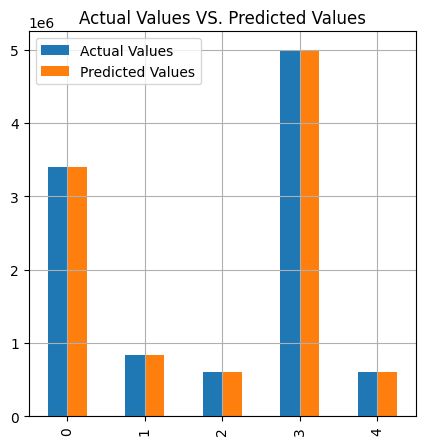

In [95]:
# compare the actual and predicted values using bar graph
results = results.head()
results.plot(kind = 'bar', figsize = (5,5))
plt.title('Actual Values VS. Predicted Values', fontsize=12);
plt.grid()

In [96]:
from sklearn.metrics import r2_score

# getting the r2; Measures of accuracy
score = r2_score(Y_test, Y_pred)
print('Coefficient of Determination: {}'.format(score*100))

Coefficient of Determination: 99.7515523568399


#Analyze the Improvements and Check for Overfitting

In [97]:
test_r2 = model.score(X_test, Y_test)
print("Test R^2:", test_r2)


Test R^2: 0.997515523568399


In [98]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute missing values using the mean for each column in X
imputer = SimpleImputer(strategy='mean')  # Create an imputer with 'mean' strategy
X_imputed = imputer.fit_transform(X)  # Fit and transform the imputer on X

#Use Cross-Validation:



In [99]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# ... (Your previous code to create X and Y) ...

# Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute missing values using the mean for each column in X
imputer = SimpleImputer(strategy='mean')  # Create an imputer with 'mean' strategy
X_imputed = imputer.fit_transform(X)  # Fit and transform the imputer on X

# Now, use X_imputed (the imputed data) in cross_val_score
cv_scores = cross_val_score(model, X_imputed, Y, cv=5, scoring='r2')
print("Cross-Validation R^2 Scores:", cv_scores)
print("Mean R^2:", cv_scores.mean())

Cross-Validation R^2 Scores: [0.99993201 0.99995095 0.99492596 0.99992733 0.99993332]
Mean R^2: 0.9989339113432667


In [100]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)
print(feature_importance)


            Feature   Coefficient
0                GS  1.000000e+03
20  Salary_minus_GS  1.000000e+00
17       log_Salary  4.224539e-10
6               SH%  3.056440e-10
2              GS/G  2.141127e-10
11      TOI_squared  2.058851e-10
3              TOI%  8.801228e-11
1            TOI/GP  6.932421e-11
18           log_GS  2.845519e-11
14     TOI_GP_to_GS  2.904156e-12
5              Grit  1.323237e-12
7              Pace  1.268583e-12
12       GS_squared  2.497109e-13
10         IPP_Pace  2.013115e-14
4              OTOI -5.789691e-14
13         SH_cubed -1.726453e-13
9            TOI_SH -5.057739e-12
19           GS_bin -7.292118e-12
16         Pace_TOI -5.435572e-11
8            TOI_GS -2.914452e-10
15           SH_PDO -6.845283e-09


#Regularization

In [101]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# ... (your existing code to load and prepare data) ...

# Replace infinite values with NaN in both X_train and X_test
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute NaN values using the mean for each column in X_train and X_test
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median'
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)  # Use transform, not fit_transform, for X_test

# Now, use the imputed data for fitting and scoring the Ridge model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_imputed, Y_train)  # Use X_train_imputed
print("Ridge R^2:", ridge_model.score(X_test_imputed, Y_test))  # Use X_test_imputed

Ridge R^2: 0.9965927604632471


In [102]:
df.columns.values

array(['Salary', 'GS', 'TOI/GP', 'GS/G', 'TOI%', 'OTOI', 'Grit', 'SH%',
       'Pace', 'TOI_GS', 'TOI_SH', 'IPP_Pace', 'TOI_squared',
       'GS_squared', 'SH_cubed', 'TOI_GP_to_GS', 'SH_PDO', 'Pace_TOI',
       'log_Salary', 'log_GS', 'GS_bin', 'Salary_minus_GS'], dtype=object)

In [103]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge

# Replace infinite values with NaN in both X_train and X_test
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute NaN values using the mean for each column in X_train and X_test
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median'
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)  # Use transform, not fit_transform, for X_test

# Now, use the imputed data for fitting and scoring the Ridge model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_imputed, Y_train)  # Use X_train_imputed
print("Ridge R^2:", ridge_model.score(X_test_imputed, Y_test))  # Use X_test_imputed

Ridge R^2: 0.9965927604632471


#Check for Redundant Features

In [104]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer


# Replace infinite values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute NaN values using the mean
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Calculate VIF with imputed data
vif_data = pd.DataFrame()
vif_data["Feature"] = df_imputed.columns
vif_data["VIF"] = [variance_inflation_factor(df_imputed.values, i) for i in range(df_imputed.shape[1])]

print(vif_data)

            Feature          VIF
0                GS   482.547516
1            TOI/GP  1842.525958
2              GS/G    66.488733
3              TOI%  6139.169413
4              OTOI    63.818380
5              Grit     8.050106
6               SH%  1523.418939
7              Pace   845.166253
8            TOI_GS   360.511451
9            TOI_SH   334.175228
10         IPP_Pace    14.307558
11      TOI_squared  1093.855258
12       GS_squared    49.484200
13         SH_cubed    18.076702
14     TOI_GP_to_GS     2.252205
15           SH_PDO  1222.637604
16         Pace_TOI   290.993243
17       log_Salary  1924.613372
18           log_GS   232.568626
19           GS_bin     4.253521
20  Salary_minus_GS    15.594965


#Feature Selection

In [105]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
selector = RFE(model, n_features_to_select=10, step=1)
selector.fit(X_train, Y_train)
selected_features = X_train.columns[selector.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['GS', 'TOI/GP', 'GS/G', 'TOI_GS', 'TOI_squared', 'SH_PDO', 'Pace_TOI',
       'log_Salary', 'GS_bin', 'Salary_minus_GS'],
      dtype='object')


In [106]:
new_df = X_train[selected_features]
new_df

,GS,TOI/GP,GS/G,TOI_GS,TOI_squared,SH_PDO,Pace_TOI,log_Salary,GS_bin,Salary_minus_GS
167,28.4,21.67,0.40,0.335436,0.649756,0.286791,3.188525,15.424949,0,4971600.0
54,5.8,8.78,0.30,0.055313,0.120226,0.111763,6.073033,13.582949,0,786700.0
577,0.1,13.72,0.03,0.025149,0.261913,0.313967,4.320987,13.737550,0,924900.0
93,61.5,17.60,0.76,0.569109,0.409823,0.321499,3.777027,15.089476,1,3513500.0
545,2.9,10.68,0.06,0.041689,0.161217,0.165908,4.944723,13.680980,0,871225.0
...,...,...,...,...,...,...,...,...,...,...
20,34.9,22.05,0.46,0.411840,0.668836,0.252808,3.299191,15.424949,0,4965100.0
106,74.4,19.13,0.92,0.752371,0.509819,0.331436,3.669725,15.607270,1,5925600.0
270,15.3,13.17,0.20,0.133377,0.249460,0.174763,4.436975,13.955273,0,1134700.0
435,21.3,18.28,0.30,0.226453,0.476475,0.212773,3.813880,13.910822,0,1078700.0


In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = new_df.columns
vif_data["VIF"] = [variance_inflation_factor(new_df.values, i) for i in range(new_df.shape[1])]
print(vif_data)


           Feature         VIF
0               GS  192.989135
1           TOI/GP  956.215353
2             GS/G   22.804341
3           TOI_GS  229.050802
4      TOI_squared  335.633742
5           SH_PDO   21.775920
6         Pace_TOI   71.875144
7       log_Salary  509.417318
8           GS_bin    3.329979
9  Salary_minus_GS    5.823356


In [108]:
reduced_features = ['GS', 'GS/G', 'SH_PDO', 'Pace_TOI', 'GS_bin', 'Salary_minus_GS']
X_train_reduced = X_train[reduced_features]
X_test_reduced = X_test[reduced_features]

In [109]:
vif_data_reduced = pd.DataFrame()
vif_data_reduced["Feature"] = X_train_reduced.columns
vif_data_reduced["VIF"] = [variance_inflation_factor(X_train_reduced.values, i) for i in range(X_train_reduced.shape[1])]
print(vif_data_reduced)


           Feature        VIF
0               GS  18.238608
1             GS/G  20.755310
2           SH_PDO  13.405558
3         Pace_TOI   7.472806
4           GS_bin   2.884537
5  Salary_minus_GS   3.228713


#Regularization (Lasso or Ridge Regression)

In [110]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_reduced, Y_train)

print("Ridge Coefficients:")
print(pd.Series(ridge.coef_, index=X_train_reduced.columns))


Ridge Coefficients:
GS                 999.959992
GS/G                 2.017973
SH_PDO               0.174516
Pace_TOI            -0.130624
GS_bin               0.588299
Salary_minus_GS      1.000000
dtype: float64


#Cross Validation

In [111]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

# Assuming X_train and y_train are your features and target
ridge = Ridge()
cv_scores = cross_val_score(ridge, X_train_reduced, Y_train, cv=5, scoring='neg_mean_squared_error')

print(f'Cross-validation MSE scores: {-cv_scores}')
print(f'Average Cross-validation MSE: {-cv_scores.mean()}')


Cross-validation MSE scores: [0.25520188 0.11678736 0.10062182 0.20271294 0.09224324]
Average Cross-validation MSE: 0.15351344803374145


#Hyperparameter Tuning (Alpha for Ridge Regression)

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Set the range of alpha values to test
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Initialize Ridge model
ridge = Ridge()

# Set up GridSearchCV for cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train_reduced, Y_train)

# Get the best alpha
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

# Get the best model and evaluate it
best_model = grid_search.best_estimator_
cross_val_score(best_model, X_train_reduced, Y_train, cv=5, scoring='neg_mean_squared_error')


Best alpha: 0.01


array([-3.88069577e-05, -1.52753930e-05, -1.26963900e-05, -2.93262351e-05,
       -1.06746123e-05])

In [113]:
# Assuming X_test and y_test are your test features and target variables
# Create the Ridge model with the best alpha
best_ridge_model = Ridge(alpha=0.01)

# Fit the model to the training data
best_ridge_model.fit(X_train_reduced, Y_train)

# Make predictions on the test set
y_pred = best_ridge_model.predict(X_test_reduced)

# Evaluate the performance on the test set
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R² on the test set
mse_test = mean_squared_error(Y_test, y_pred)
r2_test = r2_score(Y_test, y_pred)

print(f"Test Set MSE: {mse_test}")
print(f"Test Set R²: {r2_test}")


Test Set MSE: 11694807082.671734
Test Set R²: 0.9975155235727103


#Residual Analysis

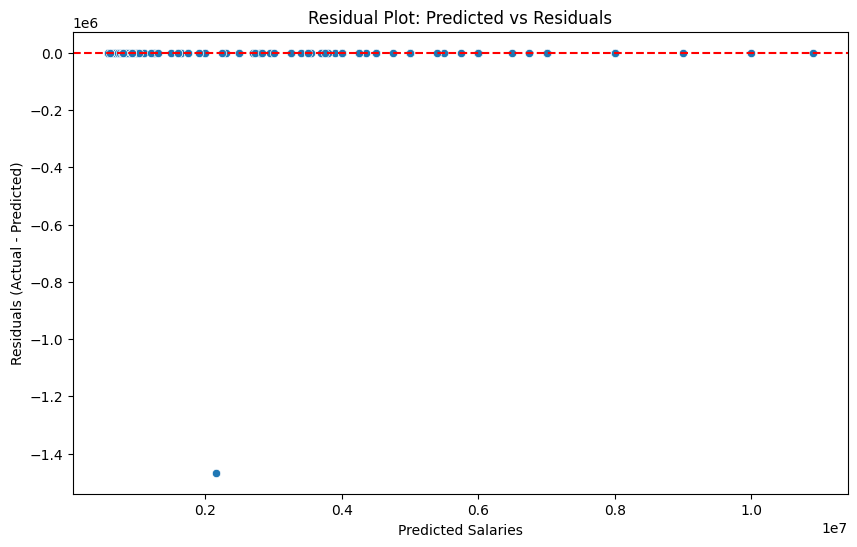

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the residuals
residuals = Y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.title("Residual Plot: Predicted vs Residuals")
plt.xlabel("Predicted Salaries")
plt.ylabel("Residuals (Actual - Predicted)")
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Q-Q plot (to check if residuals are normally distributed)
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()
